# Pre-Processing of Data

In [1]:
# Misc
import os
import sys
from timeit import default_timer as timer 
import datetime
now = datetime.datetime.now()

# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy.stats import norm,kstest
from make_plots import*
from numpyfy import*

from scipy.signal import welch
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Sanity check for jupyter notebooks
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\gabri\Documents\GitHub\IceClassic\sandbox\content



# [Nenana Ice Classic](https://www.nenanaakiceclassic.com/)
> The Ice Classic is Alaska's greatest guessing game! 
In Nenana during 1917 a group of engineers surveying for the Alaska Railroad bet $800 putting in their guesses when the river would break up. This fun little guessing game has turned into an incredible tradition that has now continued for over 100 years! 
Buy and turn in your $3.00 ticket between February 1st and April 5th to be involved in this long running Alaskan tradition. 

# Motivation 
We want to 
- Predict day of break up
- Predict time of break up
- Create betting strategy
- Have fun


# Loading the dataframe
The source and explanation of each column is in the txt.

In [2]:
Data=pd.read_csv('Time_series_DATA.txt',skiprows=149,index_col=0)
# Data.loc['2017-01-06', 'IceThickness [cm]'] = 88.9
# Data.loc['2017-06-01', 'IceThickness [cm]'] = np.nan
# Data=pd.read_csv('https://github.com/iceclassic/sandbox/blob/main/content/Time_series_DATA.txt?raw=true',index_col=0,skiprows=149)

# Inspecting Data

In [3]:
Data.index=pd.to_datetime(Data.index)
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41351 entries, 1854-01-01 to 2024-02-06
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Regional: Air temperature [C]                      38563 non-null  float64
 1   Days since start of year                           38563 non-null  float64
 2   Days until break up                                38563 non-null  float64
 3   Predicted ice thickness [m]                        38563 non-null  float64
 4   Noisy predicted ice thickness [m]                  25762 non-null  float64
 5   Nenana: Rainfall [mm]                              29547 non-null  float64
 6   Nenana: Snowfall [mm]                              19945 non-null  float64
 7   Nenana: Snow depth [mm]                            15984 non-null  float64
 8   Nenana: Mean water temperature [C]                 2418 non-null   fl

## Mechanical-break up years

Is there any anomaly in other variables that may explained why we had a mechanical break ups on those days.

In the excel we suspect that the break-up mechanisms for `multiyear=[2007,2008,2009,2010,2011,2013,2021]`is probably mechanical instead of thermal.

Lets see if there is any anomalies.

In [4]:

Data_selected=Filter_Numpify(Data,'2000-01-01','2005-12-31',numpyfy=False,multiyear=[2007,2008,2009,2010,2011,2013,2021])
drop_mask = Data_selected[['IceThickness [cm]']].notna().all(axis=1)
drop_mask2 = Data_selected[['Nenana: Snowfall [mm]']].notna().all(axis=1)
Data_selec_ice=Data_selected[drop_mask]
Data_selec_snow=Data_selected[drop_mask2]

multi


## Ice thickness

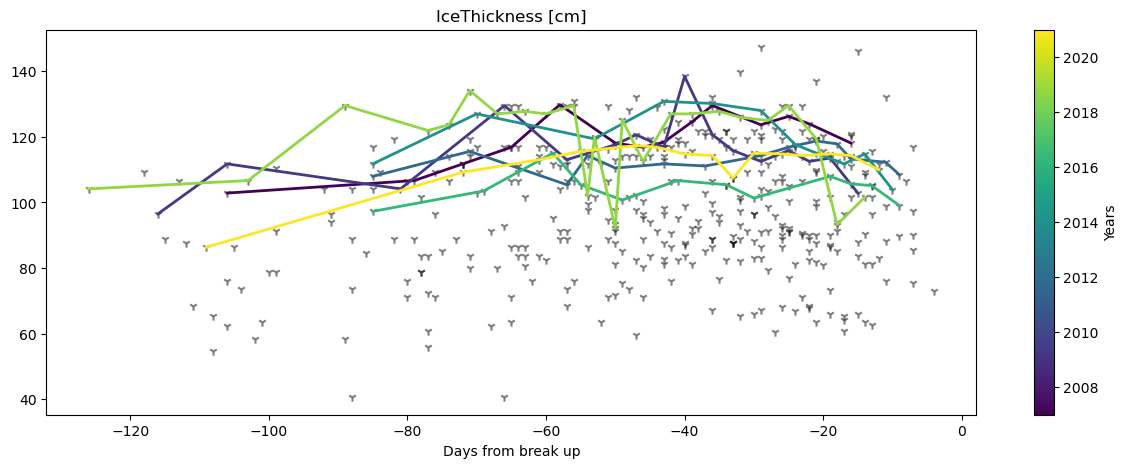

In [5]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['IceThickness [cm]'],color='k',marker='1',alpha=0.5)
plt.xlabel('Days from break up')
plt.title("IceThickness [cm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selec_ice[Data_selec_ice.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['IceThickness [cm]'],linewidth=2, marker=',', color=colors[i], alpha=1)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
plt.show()

Ice thickness measurment for the selected days are on the upper side

# Temperature

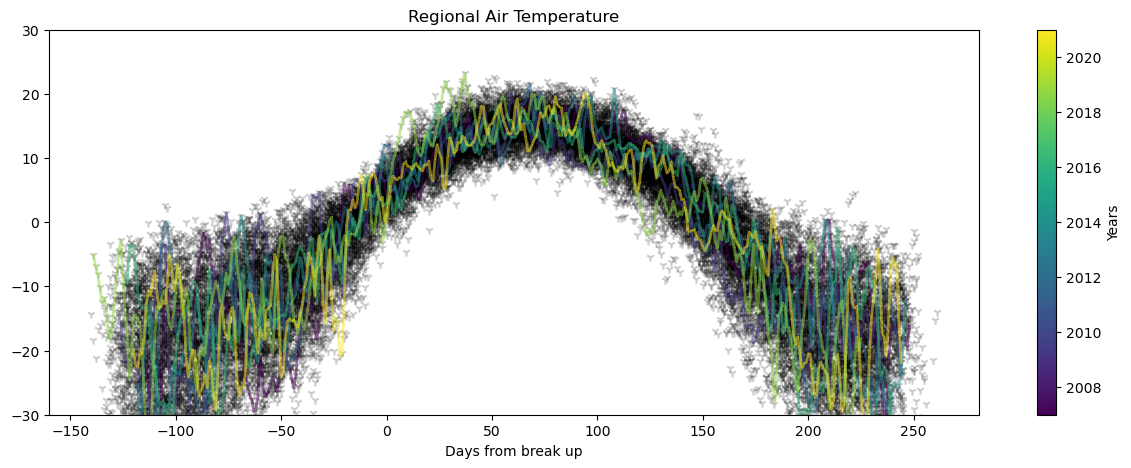

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Regional: Air temperature [C]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Regional Air Temperature")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Regional: Air temperature [C]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)


sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
#plt.xlim([-150,50])
ax1.set_ylim([-30,30])
plt.show()


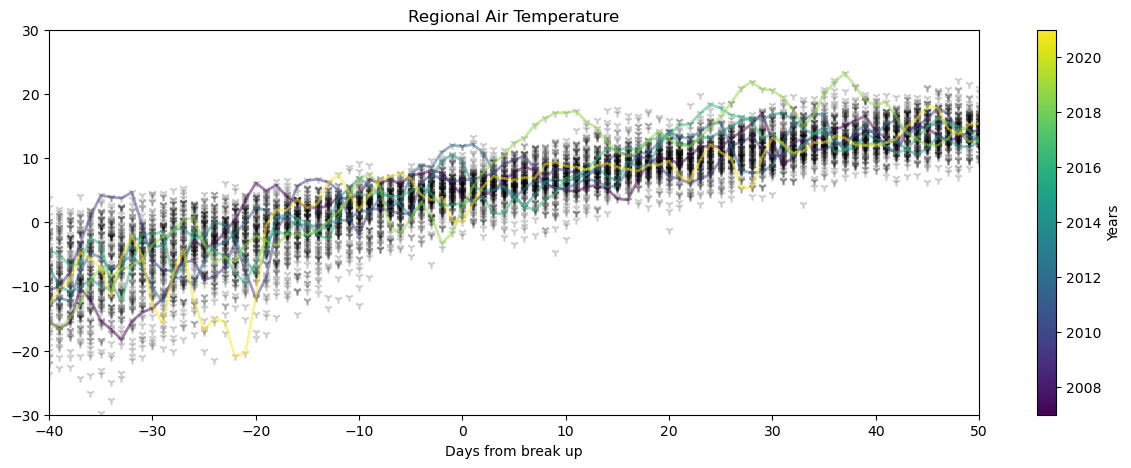

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Regional: Air temperature [C]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Regional Air Temperature")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Regional: Air temperature [C]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)


sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
#plt.xlim([-150,50])
ax1.set_ylim([-30,30])
ax1.set_xlim([-40,50])
plt.show()



not particularly hot year, probably even cold-year compared to baseline ( maybe do this with accumulated days below 5, this may clarify some of the cold-week that we wee 30-20 days before the break up)

## Discharge

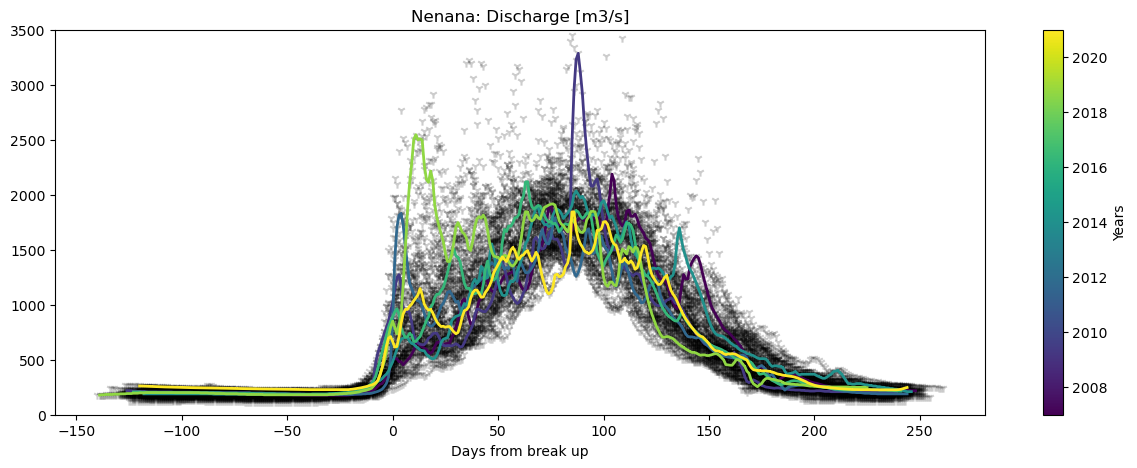

In [8]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Nenana: Mean Discharge [m3/s]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Nenana: Discharge [m3/s]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Nenana: Mean Discharge [m3/s]'],linewidth=2, marker=',', color=colors[i], alpha=1)


sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
#plt.xlim([-150,50])
ax1.set_ylim([0,3500])
plt.show()



We determined the possible mechanical-breakup years base on gage height. 
Mario established that the gage-height - discharge is a linear relationship. And we see the same trend for discharge as we did for gage height.

But, is it a predictor considering we need to  place the bet by april 5. Lets change the xlim

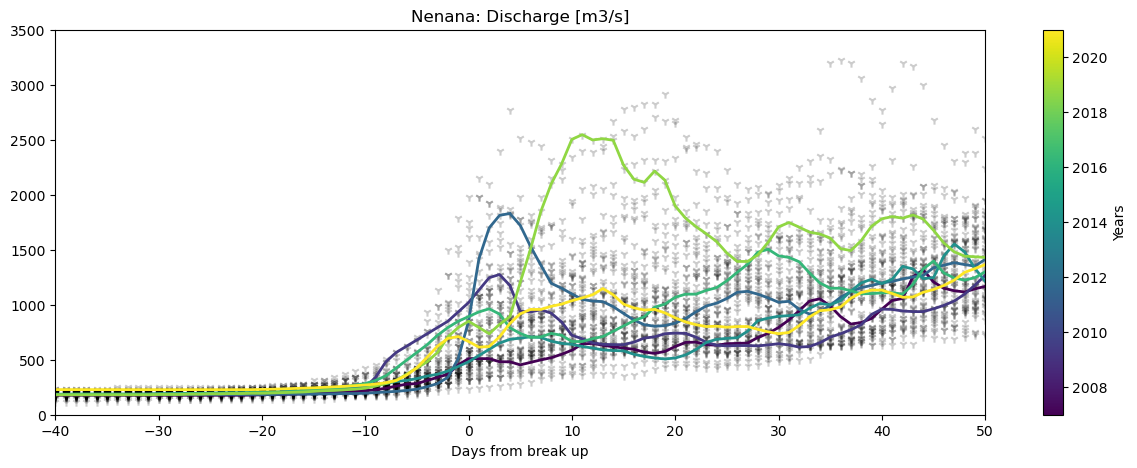

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Nenana: Mean Discharge [m3/s]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Nenana: Discharge [m3/s]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Nenana: Mean Discharge [m3/s]'],linewidth=2, marker=',', color=colors[i], alpha=1)


sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
ax1.set_xlim([-40,50])
ax1.set_ylim([0,3500])
plt.show()


uff, the increase in discharge(gage height) can only be observe at max 10-15 days before break-up, which is after april 5 for all dates

## Rainfall

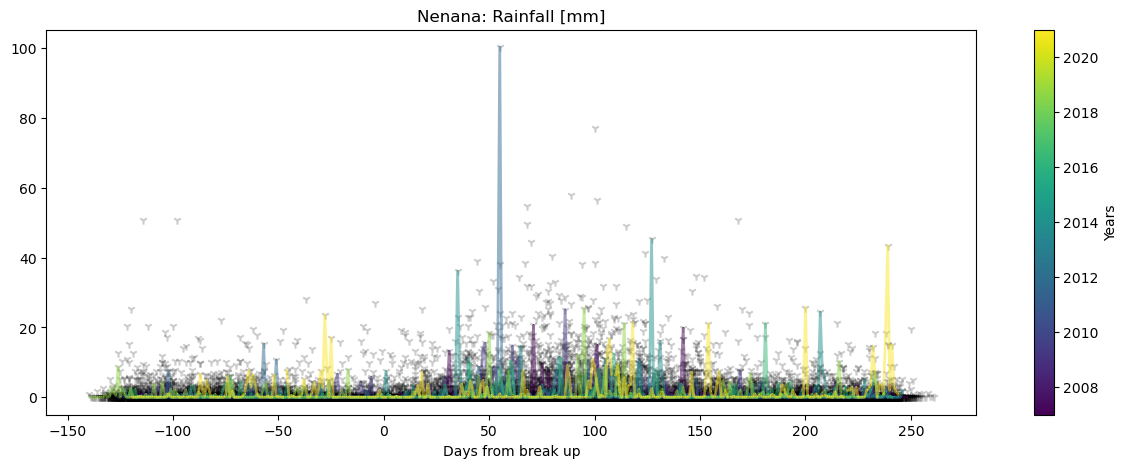

In [10]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Nenana: Rainfall [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Nenana: Rainfall [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Nenana: Rainfall [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')

(0.0, 60.0)

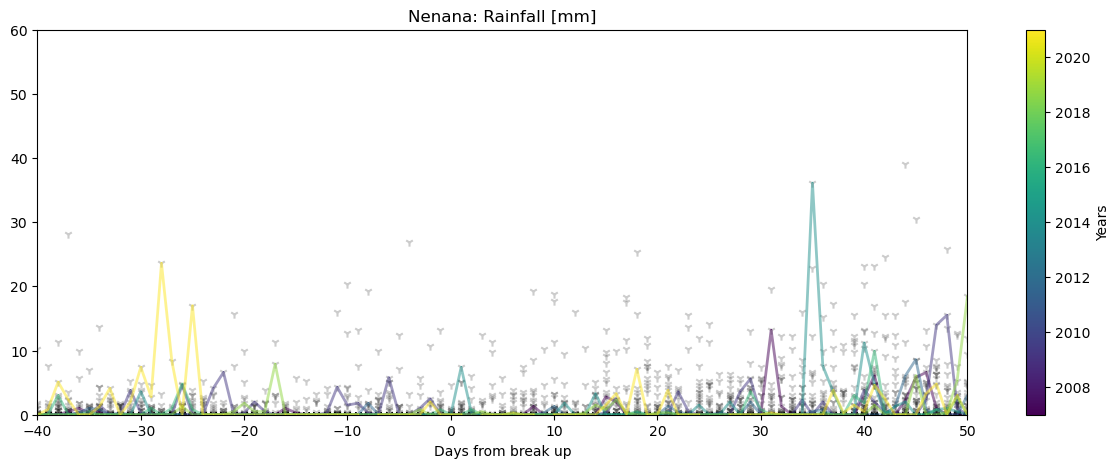

In [11]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Nenana: Rainfall [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Nenana: Rainfall [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Nenana: Rainfall [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
ax1.set_xlim([-40,50])
ax1.set_ylim([0,60])

We dont see any particular trend for the `selected_years` 

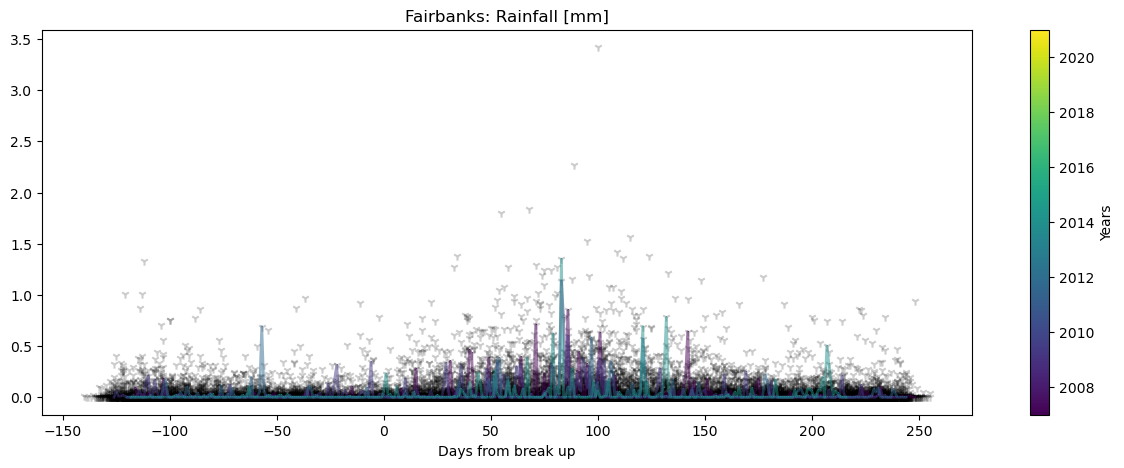

In [12]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Fairbanks: Rainfall [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Fairbanks: Rainfall [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Fairbanks: Rainfall [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')


(0.0, 1.0)

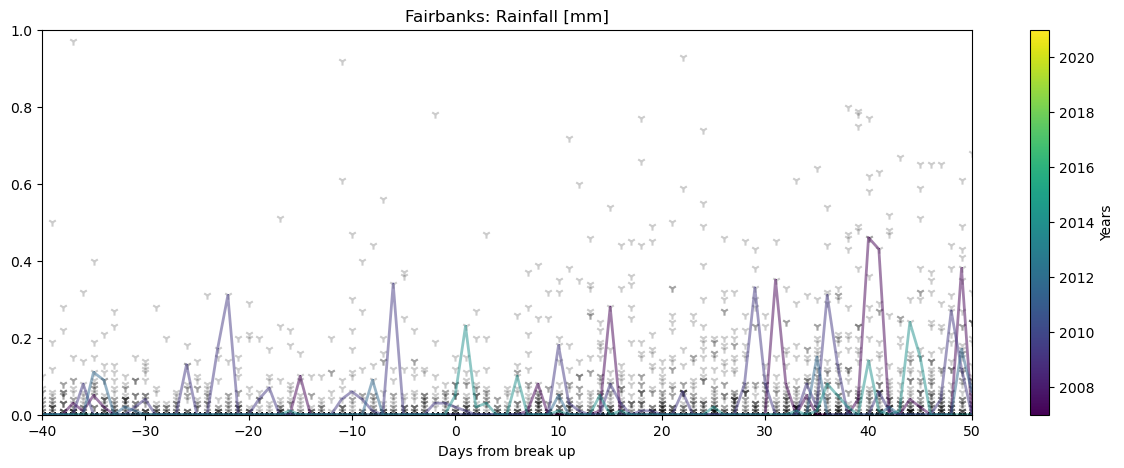

In [13]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Fairbanks: Rainfall [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Fairbanks: Rainfall [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Fairbanks: Rainfall [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
ax1.set_xlim([-40,50])
ax1.set_ylim([0,1])

same as Nenana, not really any trend

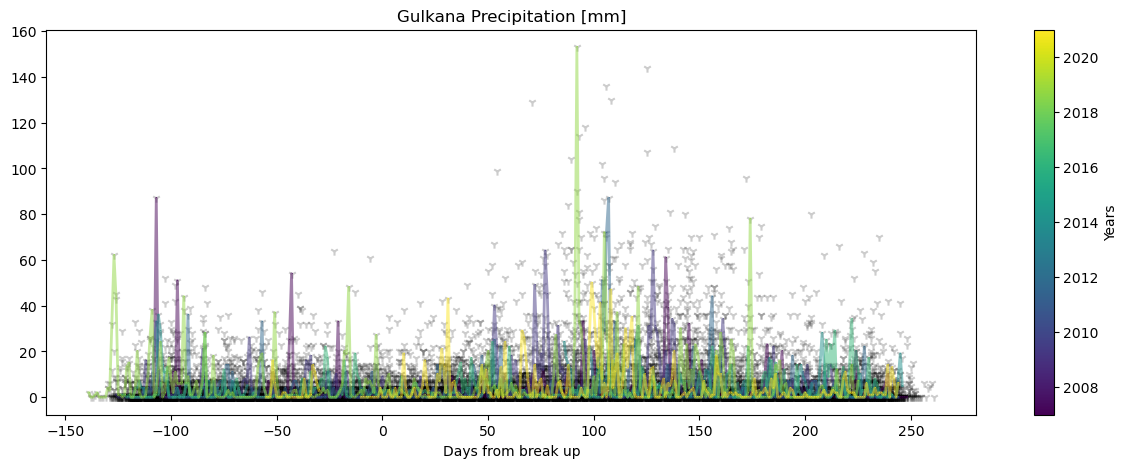

In [14]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Gulkana Precipitation [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Gulkana Precipitation [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Gulkana Precipitation [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')

(0.0, 100.0)

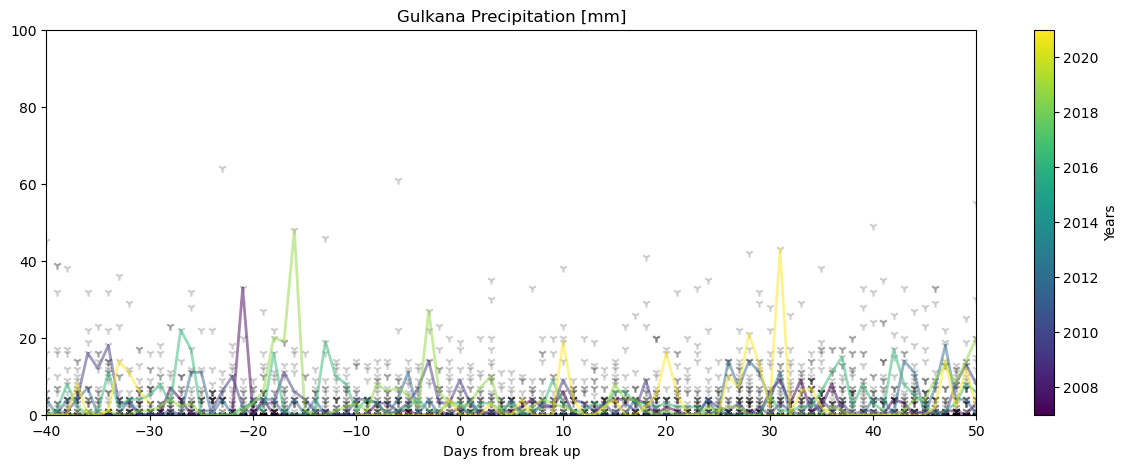

In [15]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Gulkana Precipitation [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Gulkana Precipitation [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Gulkana Precipitation [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
ax1.set_xlim([-40,50])
ax1.set_ylim([0,100])

maybe a more clear trend? 

## Snow fall

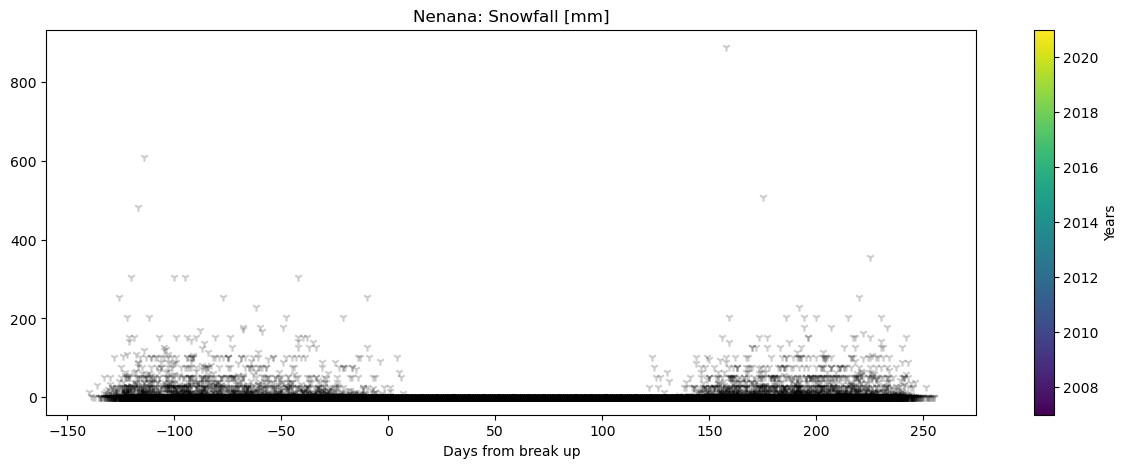

In [16]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Nenana: Snowfall [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Nenana: Snowfall [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Nenana: Snowfall [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')

no data for selected years

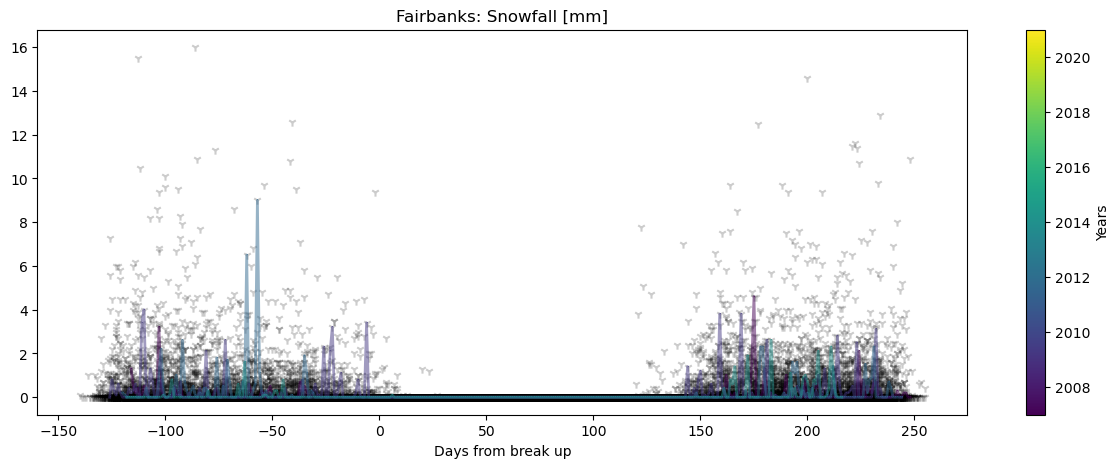

In [17]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Fairbanks: Snowfall [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Fairbanks: Snowfall [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Fairbanks: Snowfall [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')

i thick that all the data for Fairbanks is in cm instead of mm.

(0.0, 10.0)

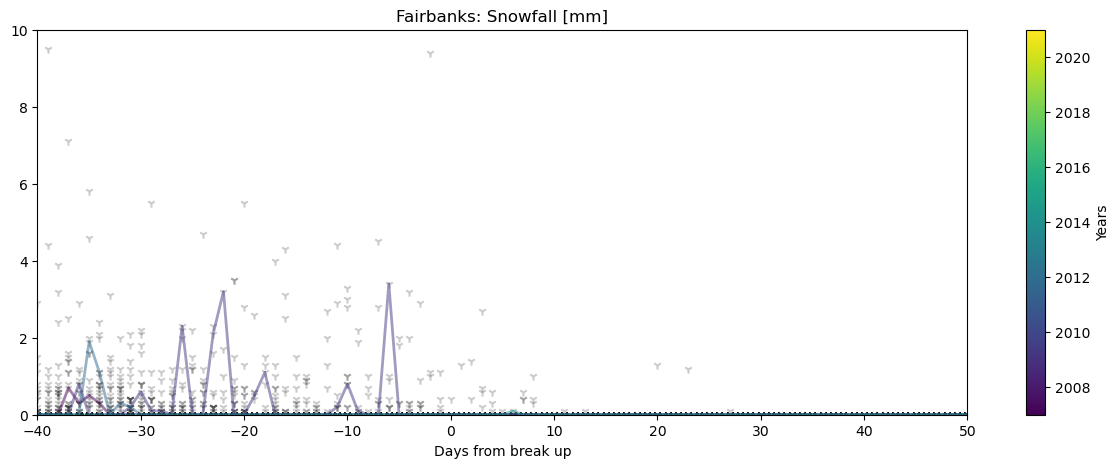

In [18]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Fairbanks: Snowfall [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Fairbanks: Snowfall [mm]")

years = Data_selected.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected[Data_selected.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Fairbanks: Snowfall [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
ax1.set_xlim([-40,50])
ax1.set_ylim([0,10])

not a lot of info

## Snowdepth

In [32]:
Data_selected2=Filter_Numpify(Data,'2000-01-01','2005-12-31',numpyfy=False,multiyear=[2007,2008,2009,2010,2011,2013,2021])
Data_snwH= Data_selected2.dropna(subset=['Nenana: Snow depth [mm]']).copy()

multi


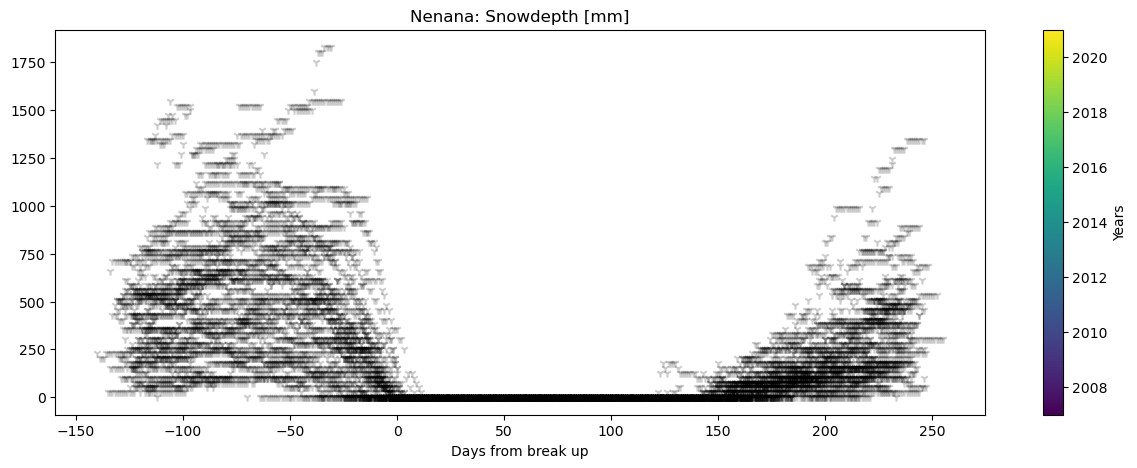

In [51]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Nenana: Snow depth [mm]'],color='k',marker='1',alpha=0.2)
plt.xlabel('Days from break up')
plt.title("Nenana: Snowdepth [mm]")

years = Data_selected2.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected2[Data_selected2.index.year == year]
        ax1.scatter(year_data['Days until break up'],year_data['Nenana: Snow depth [mm]'],linewidth=2, marker=',', color=colors[i], alpha=0.5)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
plt.show()

no data for selected years

## Glaciar melting

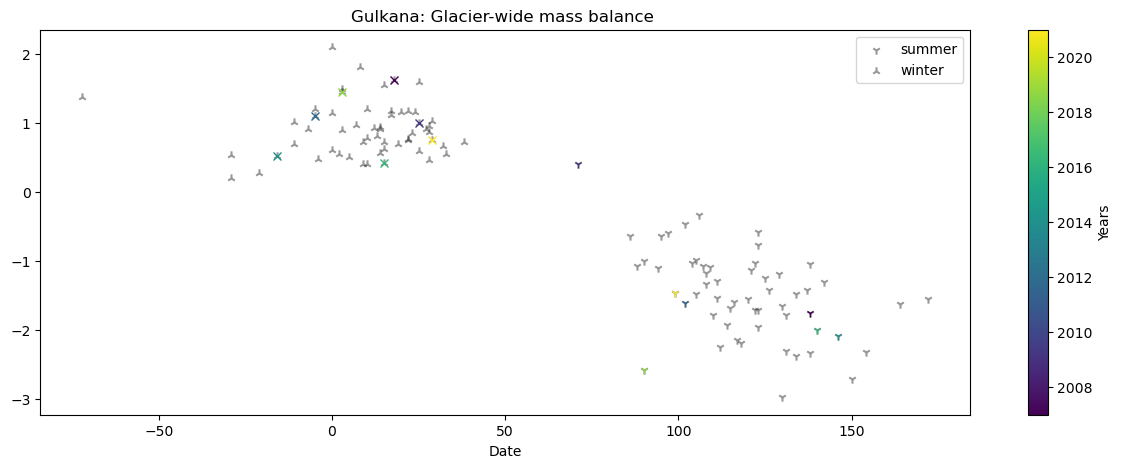

In [71]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
plt.scatter(Data['Days until break up'],Data['Gulkana: Glacier-wide summer mass balance [m.w.e]'],label="summer",color='k',marker='1',alpha=0.4)
plt.scatter(Data['Days until break up'],Data['Gulkana: Glacier-wide winter mass balance [m.w.e]'],label='winter',color='k',marker='2',alpha=0.4)
plt.title('Gulkana: Glacier-wide mass balance ')
plt.xlabel("Date")

years = Data_selected2.index.year.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
for i, year in enumerate(years):
        year_data = Data_selected2[Data_selected2.index.year == year]
        ax1.plot(year_data['Days until break up'],year_data['Gulkana: Glacier-wide summer mass balance [m.w.e]'],linewidth=1, marker='1', color=colors[i], alpha=1)
        ax1.plot(year_data['Days until break up'],year_data['Gulkana: Glacier-wide winter mass balance [m.w.e]'],linewidth=1, marker='x', color=colors[i], alpha=1)

#plt.xlim([-150,50])
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # Empty array since we just want to map colors

    # Add color bar
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Years')
plt.legend()
plt.show()

nothing out of the ordinary

## Conclusion

For the years that we considered to be mechanical-breakup years, none of the variables that we have have any anomaly that might indicate a -mechanical-break-up year